## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from imblearn.under_sampling import RandomUnderSampler
import pickle
from scipy.stats.mstats import winsorize
import sys

## LOAD DATASET

In [4]:
df = pd.read_csv('bank-additional.csv', sep=';')

In [5]:
print(f"Dataset Size: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset Size: (4119, 21)

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## RENAME VARIABLES


In [7]:
# Rename columns
df.rename(columns={
    'age': 'Age',
    'job': 'Job',
    'marital': 'Marital',
    'education': 'Education',
    'default': 'Credit',
    'housing': 'HousingLoan',
    'loan': 'PersonalLoan',
    'contact': 'ContactCommunicationType',
    'month': 'LastContactMonth',
    'day_of_week': 'LastContactDayOfWeek',
    'duration': 'CallDuration',
    'campaign': 'CampaignContacts',
    'pdays': 'PreviousContactDays',
    'previous': 'PreviousCampaignContacts',
    'poutcome': 'PreviousCampaignOutcome',
    'emp.var.rate': 'EmploymentVarRate',
    'cons.price.idx': 'ConsumerPriceIndex',
    'cons.conf.idx': 'ConsumerConfidenceIndex',
    'euribor3m': 'Euribor3M',
    'nr.employed': 'NumberOfEmployees',
    'y': 'SubscribedTermDeposit'
}, inplace=True)

# Display basic information about the dataset
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4119 non-null   int64  
 1   Job                       4119 non-null   object 
 2   Marital                   4119 non-null   object 
 3   Education                 4119 non-null   object 
 4   Credit                    4119 non-null   object 
 5   HousingLoan               4119 non-null   object 
 6   PersonalLoan              4119 non-null   object 
 7   ContactCommunicationType  4119 non-null   object 
 8   LastContactMonth          4119 non-null   object 
 9   LastContactDayOfWeek      4119 non-null   object 
 10  CallDuration              4119 non-null   int64  
 11  CampaignContacts          4119 non-null   int64  
 12  PreviousContactDays       4119 non-null   int64  
 13  PreviousCampaignContacts  4119 non-null  

## VARIABLES AND DATA TYPES

In [9]:
# List data types
print("\nData Types:")
df.dtypes
df.describe(include='object').T


Data Types:


,count,unique,top,freq
Job,4119,12,admin.,1012
Marital,4119,4,married,2509
Education,4119,8,university.degree,1264
Credit,4119,3,no,3315
HousingLoan,4119,3,yes,2175
PersonalLoan,4119,3,no,3349
ContactCommunicationType,4119,2,cellular,2652
LastContactMonth,4119,10,may,1378
LastContactDayOfWeek,4119,5,thu,860
PreviousCampaignOutcome,4119,3,nonexistent,3523


In [10]:
# Display summary statistics for categorical variables
print("\nCategorical Variables Summary:")
print(df.describe(include='object').T)


Categorical Variables Summary:
                         count unique                top  freq
Job                       4119     12             admin.  1012
Marital                   4119      4            married  2509
Education                 4119      8  university.degree  1264
Credit                    4119      3                 no  3315
HousingLoan               4119      3                yes  2175
PersonalLoan              4119      3                 no  3349
ContactCommunicationType  4119      2           cellular  2652
LastContactMonth          4119     10                may  1378
LastContactDayOfWeek      4119      5                thu   860
PreviousCampaignOutcome   4119      3        nonexistent  3523
SubscribedTermDeposit     4119      2                 no  3668


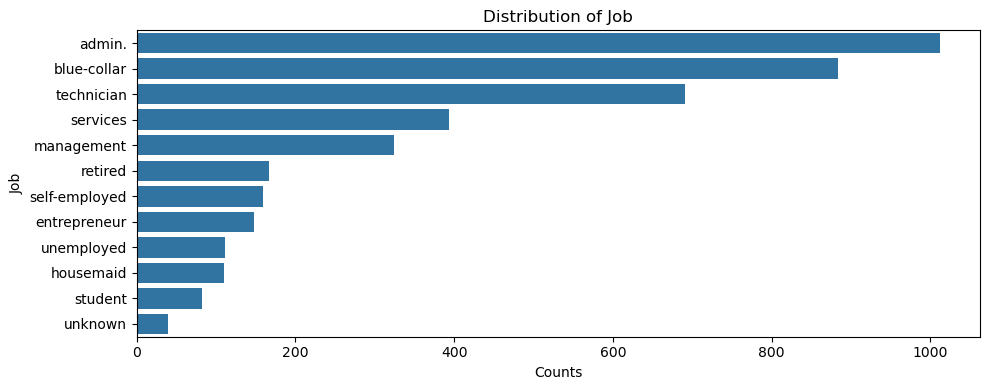

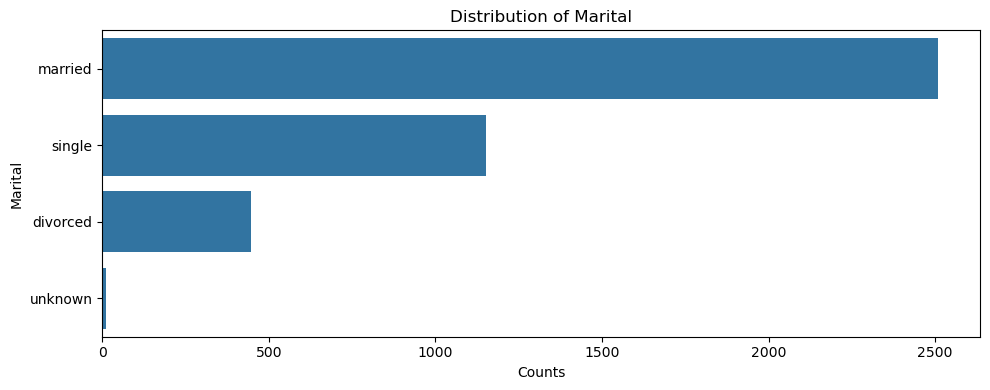

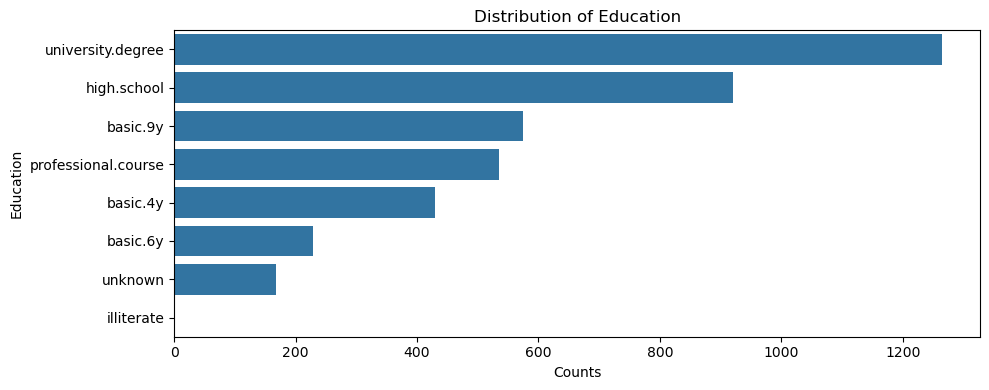

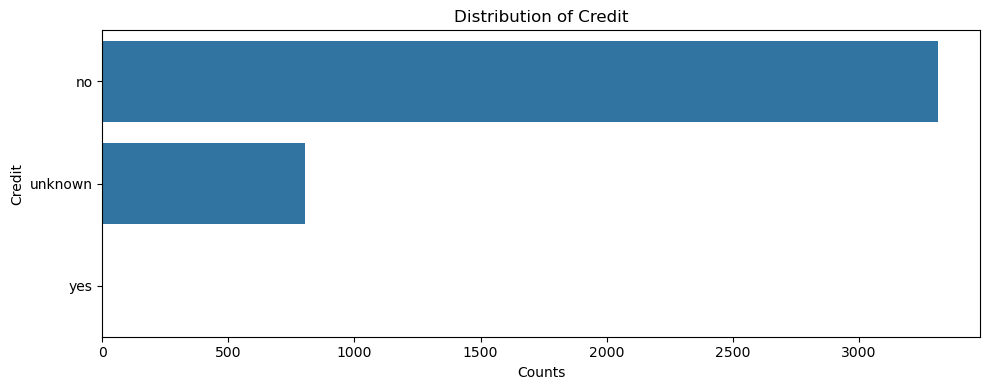

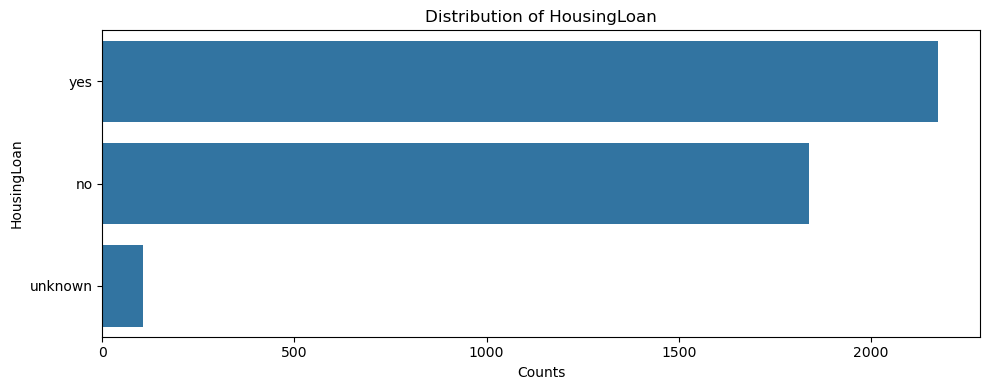

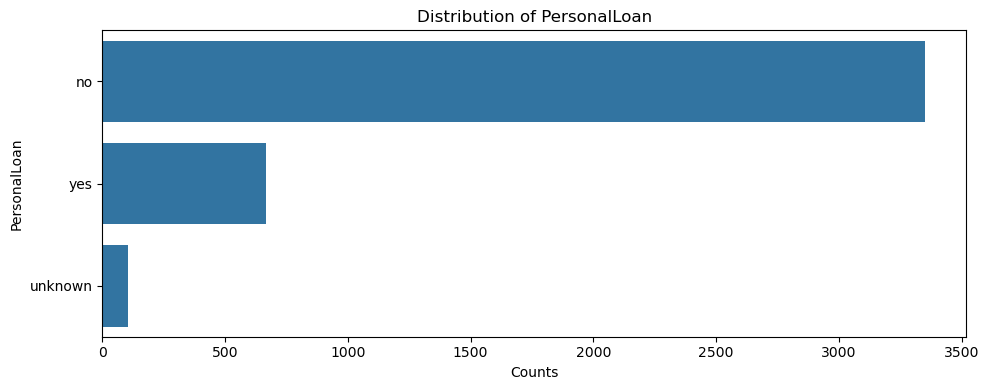

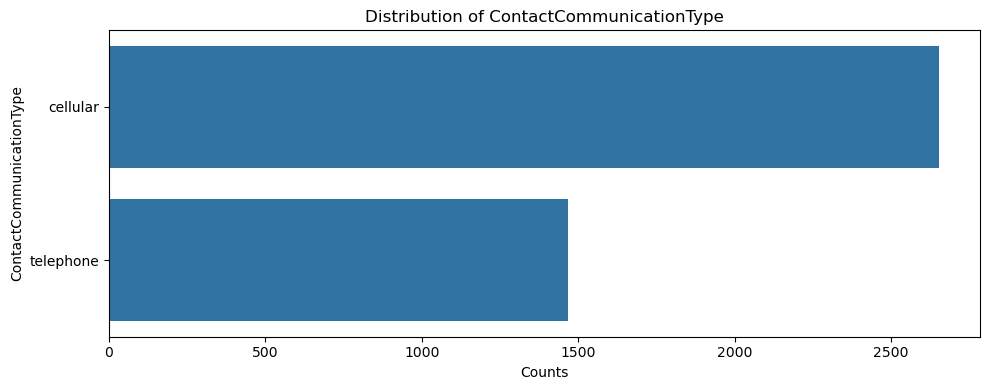

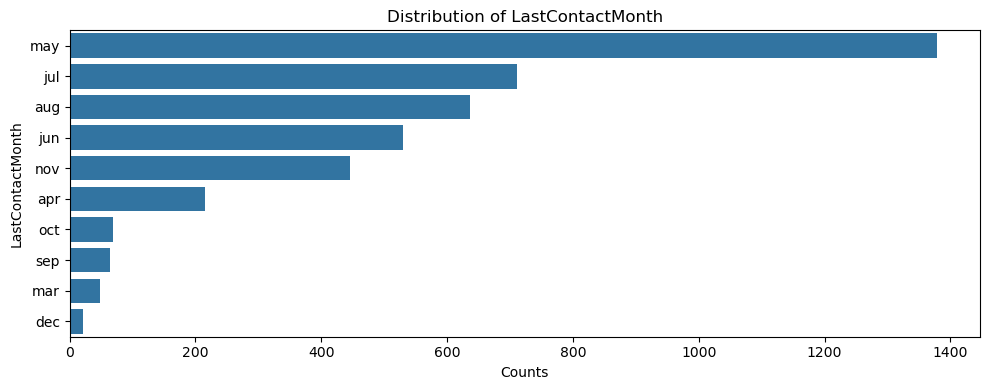

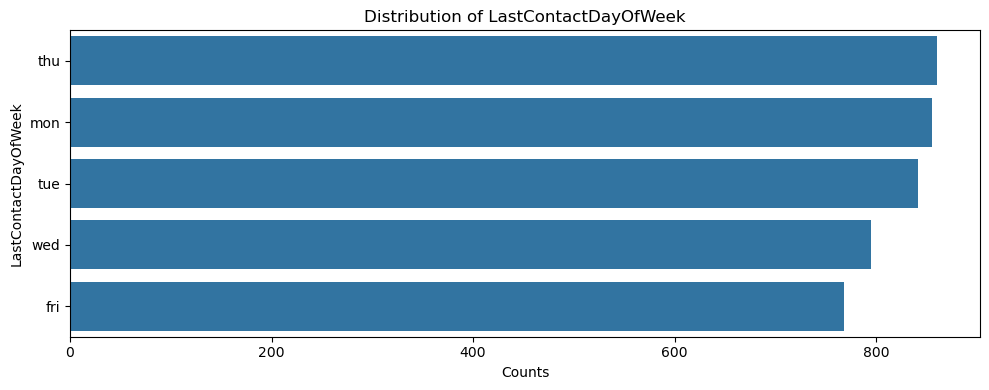

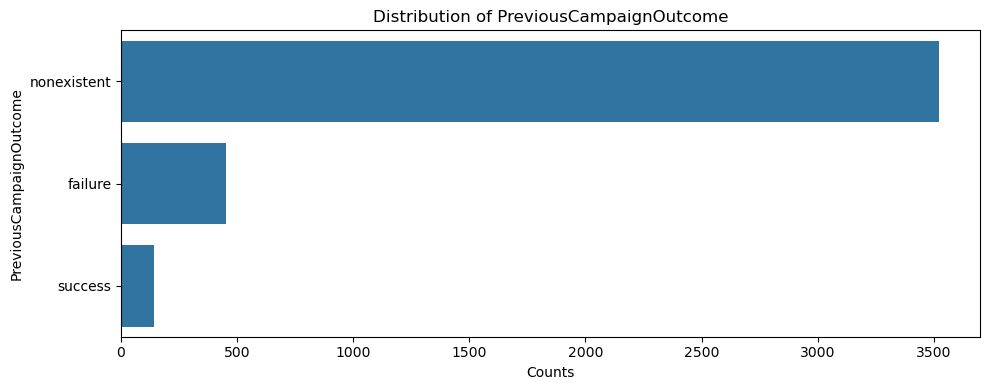

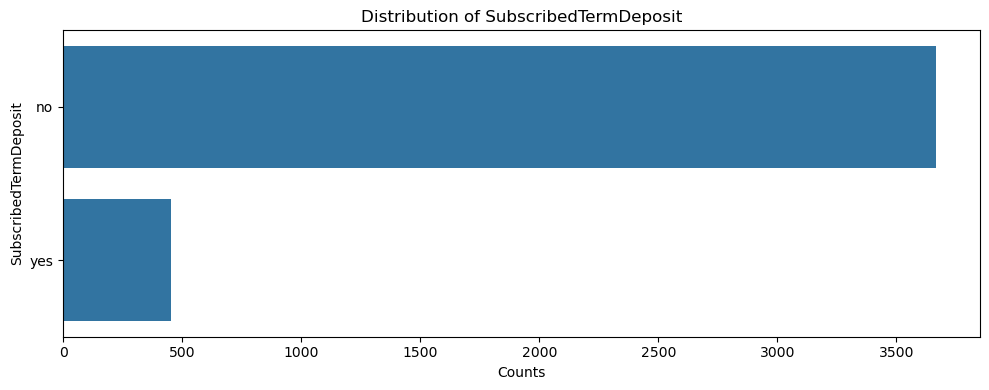

In [11]:
# Categorical Variables
categorical_variables = ['Job', 'Marital', 'Education', 'Credit', 'HousingLoan',
                         'PersonalLoan', 'ContactCommunicationType', 'LastContactMonth',
                         'LastContactDayOfWeek', 'PreviousCampaignOutcome', 'SubscribedTermDeposit']

for col in categorical_variables:
    plt.figure(figsize=(10, 4))
    sns.barplot(
        x=df[col].value_counts().values,  # Counts as x-axis
        y=df[col].value_counts().index   # Categories as y-axis
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel('Counts')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [12]:
# Numerical variables
num_var = [feature for feature in df.columns if df[feature].dtypes != 'object']

print('Number of numerical variables: ', len(num_var))

df[num_var].head()

Number of numerical variables:  10


,Age,CallDuration,CampaignContacts,PreviousContactDays,PreviousCampaignContacts,EmploymentVarRate,ConsumerPriceIndex,ConsumerConfidenceIndex,Euribor3M,NumberOfEmployees
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


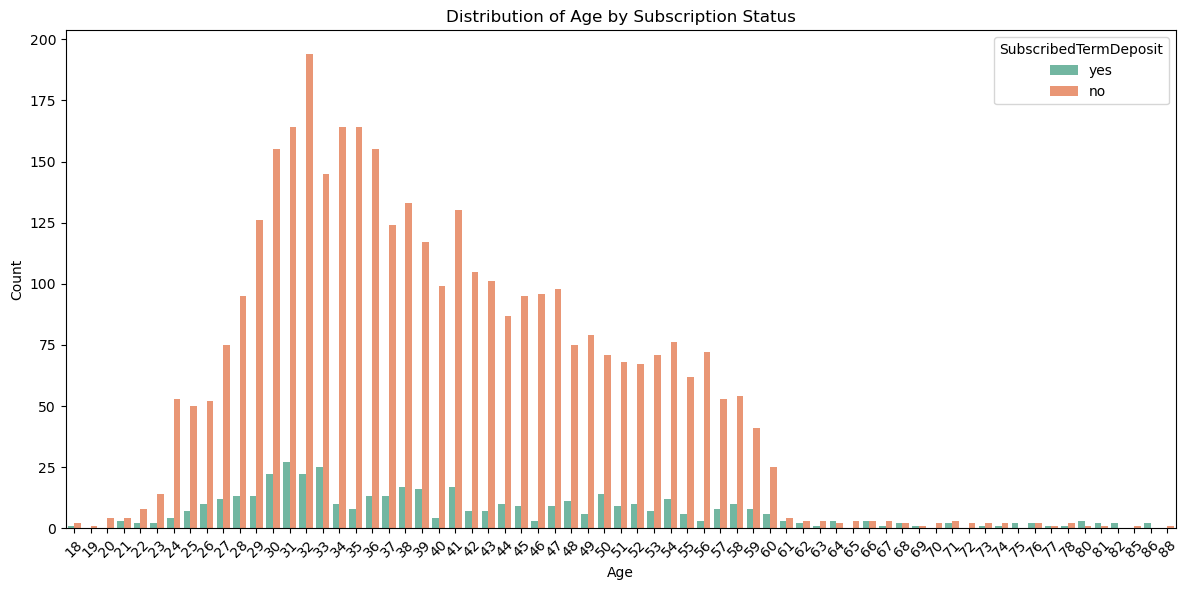

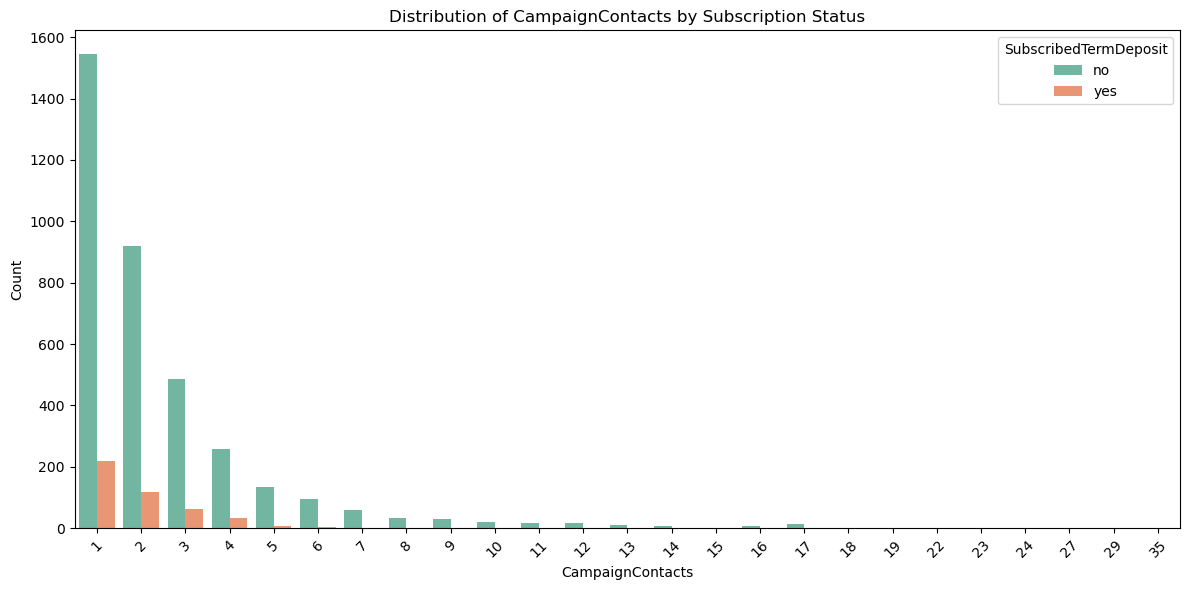

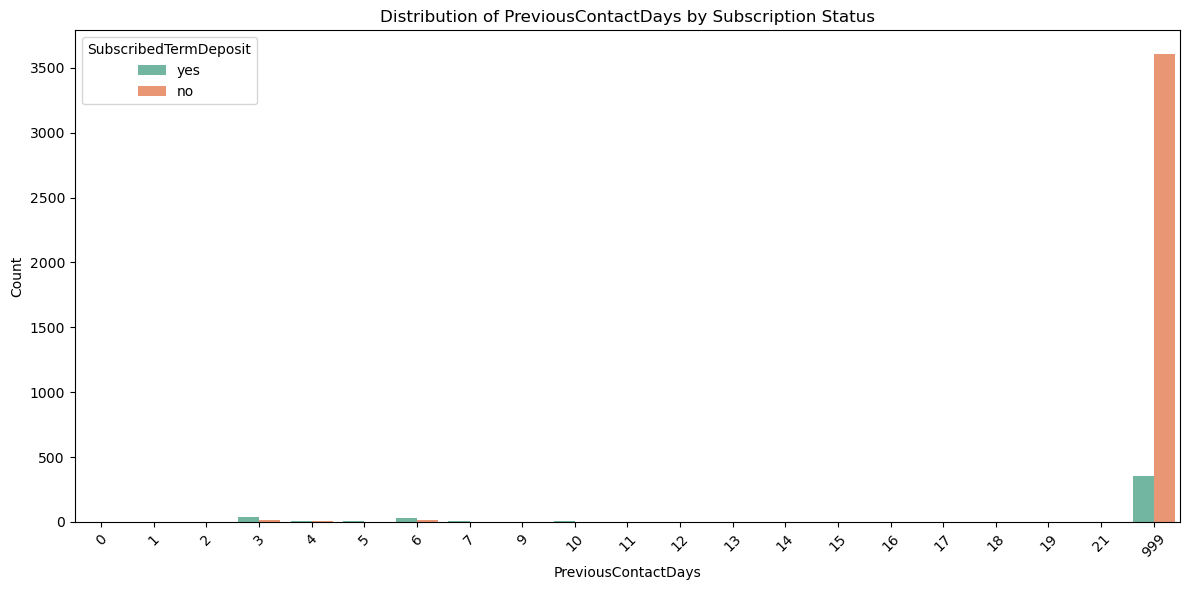

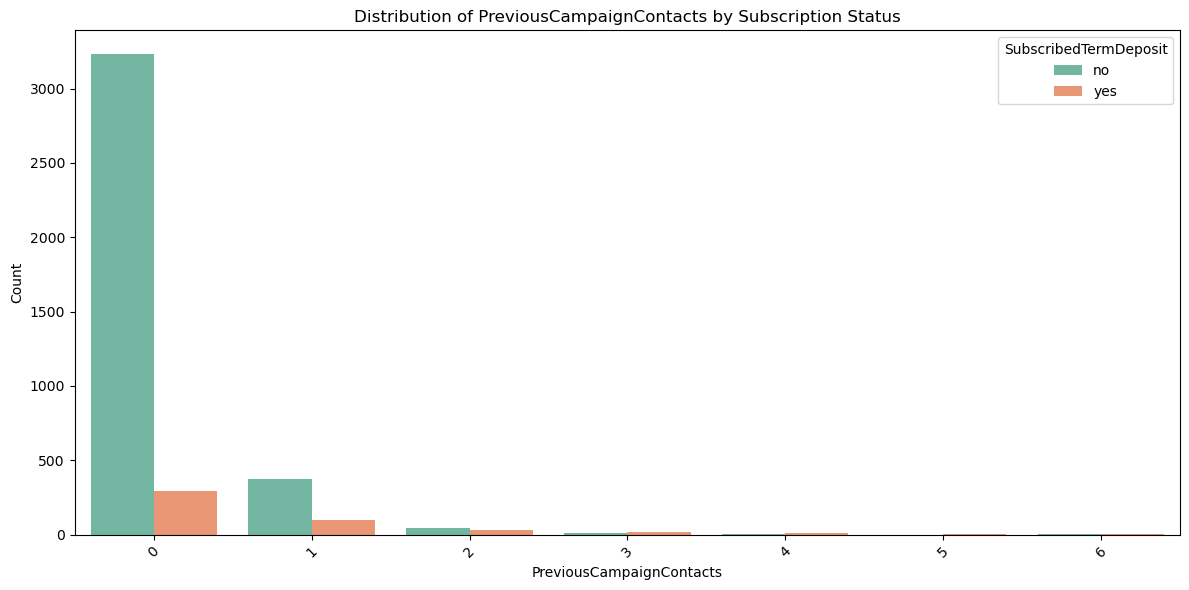

In [13]:
# Discreate Variables
discrete_var = ['Age', 'CampaignContacts', 'PreviousContactDays', 'PreviousCampaignContacts']
for feature in discrete_var:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue="SubscribedTermDeposit", data=df, palette="Set2")
    plt.title(f"Distribution of {feature} by Subscription Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()
    plt.show()

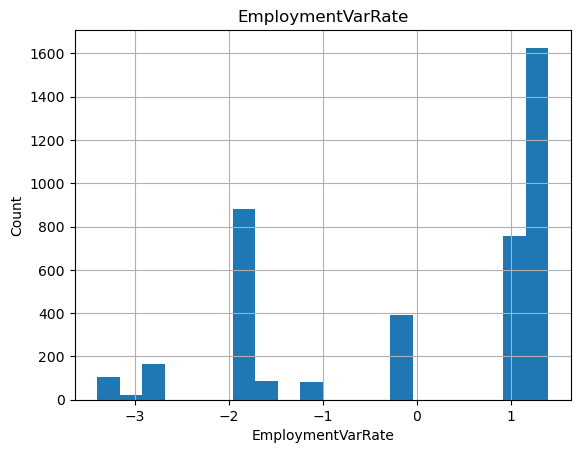

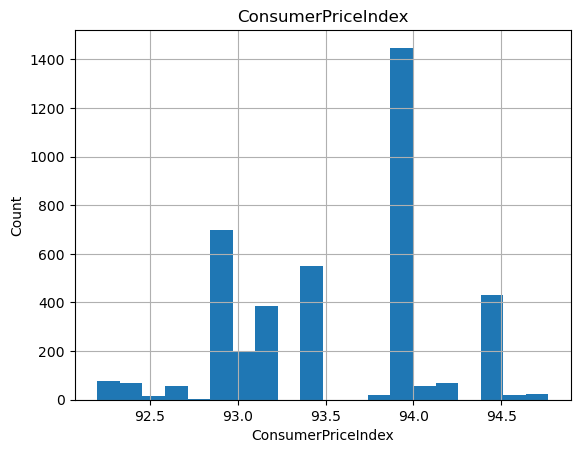

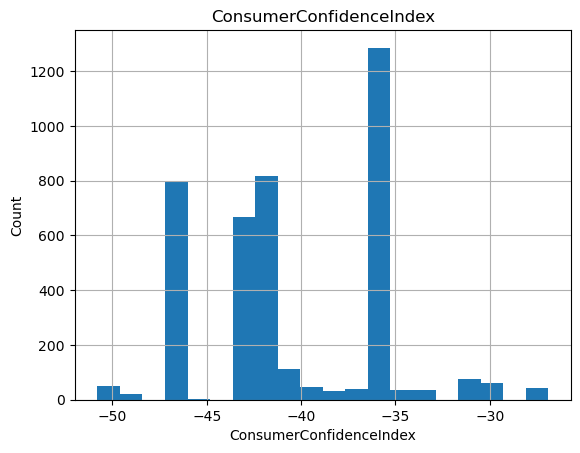

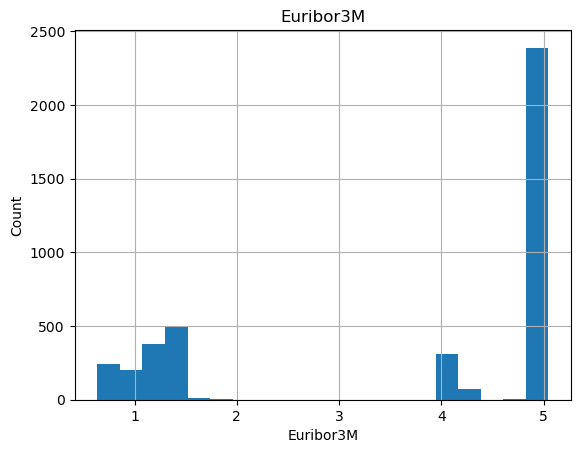

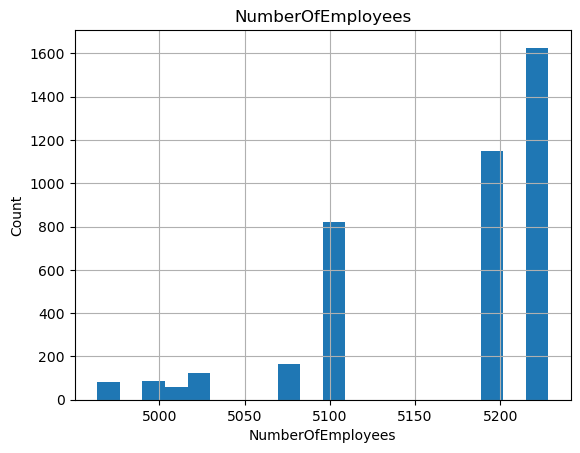

In [14]:
# Continuous variables
continuous_var = ['EmploymentVarRate', 'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3M', 'NumberOfEmployees'];

for feature in continuous_var:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## CORRELATION MATRIX

In [16]:
# Step 1: Filter Numeric Columns
numeric_df = df.select_dtypes(include=[np.number])  # Select numeric columns only

# Step 2: Calculate the Correlation Matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                               Age  CallDuration  CampaignContacts  \
Age                       1.000000      0.041299         -0.014169   
CallDuration              0.041299      1.000000         -0.085348   
CampaignContacts         -0.014169     -0.085348          1.000000   
PreviousContactDays      -0.043425     -0.046998          0.058742   
PreviousCampaignContacts  0.050931      0.025724         -0.091490   
EmploymentVarRate        -0.019192     -0.028848          0.176079   
ConsumerPriceIndex       -0.000482      0.016672          0.145021   
ConsumerConfidenceIndex   0.098135     -0.034745          0.007882   
Euribor3M                -0.015033     -0.032329          0.159435   
NumberOfEmployees        -0.041936     -0.044218          0.161037   

                          PreviousContactDays  PreviousCampaignContacts  \
Age                                 -0.043425                  0.050931   
CallDuration                        -0.046998                  0.025724   
Camp

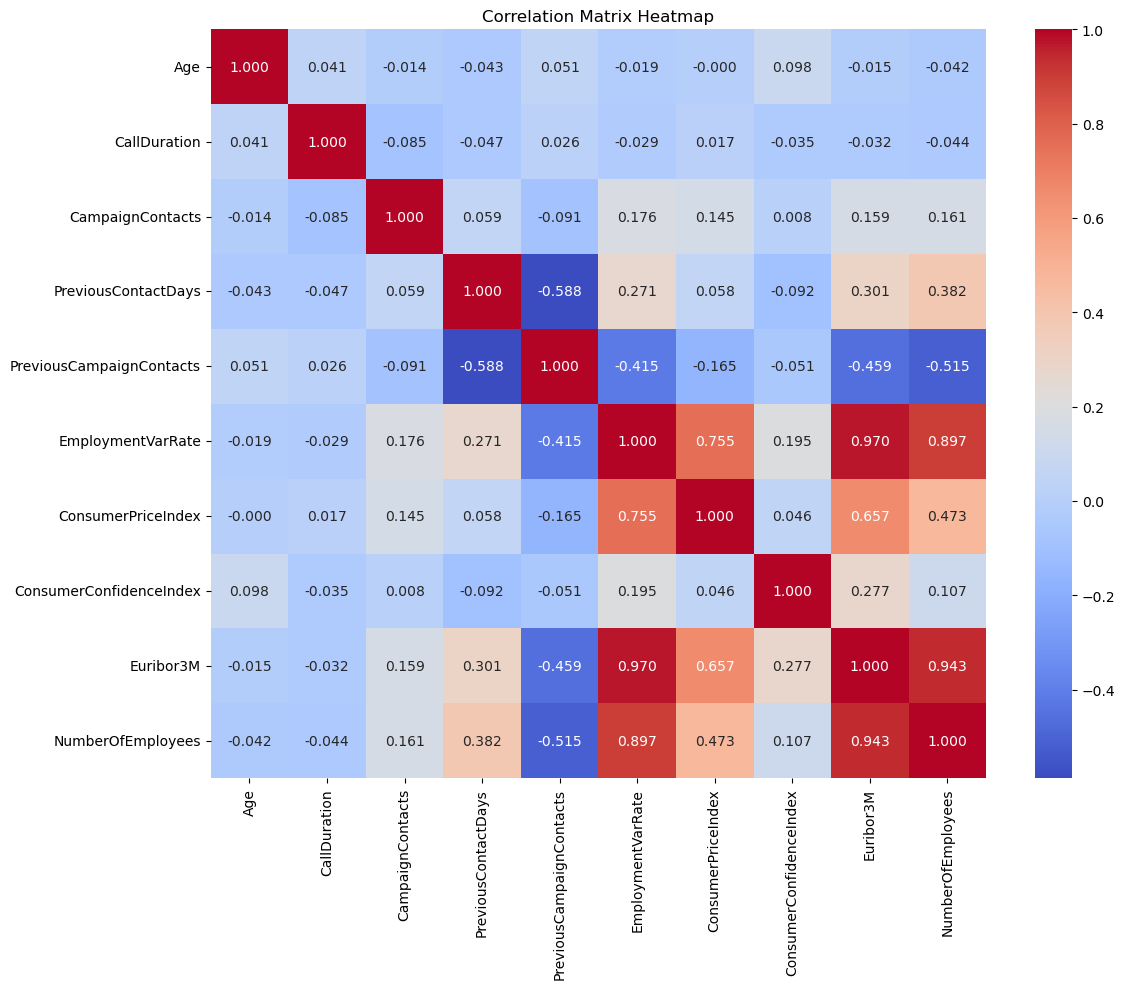

In [17]:
# Step 3: Visualize the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

## DATA CLEANING

### Checking Outliers

In [20]:
# Check for outliers in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("\nChecking for outliers in numerical columns...")
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers detected")


Checking for outliers in numerical columns...
Age: 39 outliers detected
CallDuration: 291 outliers detected
CampaignContacts: 235 outliers detected
PreviousContactDays: 160 outliers detected
PreviousCampaignContacts: 596 outliers detected
EmploymentVarRate: 0 outliers detected
ConsumerPriceIndex: 0 outliers detected
ConsumerConfidenceIndex: 43 outliers detected
Euribor3M: 0 outliers detected
NumberOfEmployees: 0 outliers detected


In [21]:
# Apply Winsorize
columns_to_winsorize = ['CampaignContacts', 'CallDuration', 'PreviousContactDays', 'PreviousCampaignContacts']
for col in columns_to_winsorize:
    df[col] = np.array(winsorize(df[col], limits=[0.01, 0.01]))

In [22]:
# Check Outliers Again 
print("\nChecking for outliers in numerical columns AFTER winsorization...")
for col in columns_to_winsorize:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: {outliers} outliers remaining")


Checking for outliers in numerical columns AFTER winsorization...
CampaignContacts: 235 outliers remaining
CallDuration: 291 outliers remaining
PreviousContactDays: 160 outliers remaining
PreviousCampaignContacts: 596 outliers remaining


In [23]:
# Check variance for Credit column
print("\nCredit column value distribution (%):")
print(df["Credit"].value_counts(normalize=True)*100)


Credit column value distribution (%):
Credit
no         80.480699
unknown    19.495023
yes         0.024278
Name: proportion, dtype: float64


In [24]:
# Drop Credit column due to low variance
df.drop('Credit', axis=1, inplace=True)

### Missing and Null Values

In [26]:
# Fill or remove missing data
df.fillna("unknown", inplace=True) # Fill missing values with "unknown"
df = df.replace('unknown', np.nan) # Mark "unknown" values As missing data
df = df.replace('nonexistent', np.nan) # Mark "unknown" values as missing data

In [27]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])



Missing values per column:
Job                          39
Marital                      11
Education                   167
HousingLoan                 105
PersonalLoan                105
PreviousCampaignOutcome    3523
dtype: int64


In [28]:
# There are too much missing values
df.drop('PreviousCampaignOutcome', axis=1, inplace=True)

In [29]:
# Impute missing values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isna().sum() > 0:
        # Replace NaN with the most frequent value
        most_frequent = df[col].value_counts().index[0]
        print(f"Imputing missing values in {col} with most frequent value: {most_frequent}")
        df[col].fillna(most_frequent, inplace=True)

Imputing missing values in Job with most frequent value: admin.
Imputing missing values in Marital with most frequent value: married
Imputing missing values in Education with most frequent value: university.degree
Imputing missing values in HousingLoan with most frequent value: yes
Imputing missing values in PersonalLoan with most frequent value: no


C:\Users\efeem\AppData\Local\Temp\ipykernel_10768\892432774.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)
C:\Users\efeem\AppData\Local\Temp\ipykernel_10768\892432774.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

## FEATURE ENGINEERING

In [31]:
# Add a new feature for call duration category
df['CallDurationCategory'] = pd.cut(df['CallDuration'], 
                                   bins=[0, 100, 300, 600, float('inf')],
                                   labels=['Very Short', 'Short', 'Medium', 'Long'])


In [32]:

# Add feature for season (based on month)
season_map = {
    'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
    'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
    'sep': 'Fall', 'oct': 'Fall', 'nov': 'Fall',
    'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter'
}
df['Season'] = df['LastContactMonth'].map(season_map)


In [33]:

# Education level mapping for ordinal encoding
education_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}

# Add education level as ordinal feature
df['EducationLevel'] = df['Education'].map(education_order)


In [34]:
df.drop('CallDuration', axis=1, inplace=True)
df.drop('LastContactMonth', axis=1, inplace=True)
df.drop('Education', axis=1, inplace=True)

In [35]:
# Check variance for PreviousContactDays column
print("\nPreviousContactDays column value distribution (%):")
print(df["PreviousContactDays"].value_counts(normalize=True)*100)



PreviousContactDays column value distribution (%):
PreviousContactDays
999    96.115562
3       1.480942
6       1.019665
4       0.339888
7       0.242777
10      0.194222
12      0.121389
5       0.097111
9       0.072833
18      0.048555
15      0.048555
16      0.048555
13      0.048555
11      0.024278
19      0.024278
17      0.024278
21      0.024278
14      0.024278
Name: proportion, dtype: float64


In [36]:
df['previous_contact'] = df['PreviousContactDays'].replace(999, -1)  # Or use a central tendency measure

In [37]:

# create 'previous_contact'
df['previous_contact'] = (df['PreviousContactDays'] != 999).astype(int) 
df.loc[df["previous_contact"]==False, "PreviousContactDays"] = -1


In [38]:
# Drop PreviousContactDays column due to low variance
df.drop('PreviousContactDays', axis=1, inplace=True)

In [39]:
df.head().T

,0,1,2,3,4
Age,30,39,25,38,47
Job,blue-collar,services,services,services,admin.
Marital,married,single,married,married,married
HousingLoan,yes,no,yes,yes,yes
PersonalLoan,no,no,no,no,no
ContactCommunicationType,cellular,telephone,telephone,telephone,cellular
LastContactDayOfWeek,fri,fri,wed,fri,mon
CampaignContacts,2,4,1,3,1
PreviousCampaignContacts,0,0,0,0,0
EmploymentVarRate,-1.8,1.1,1.4,1.4,-0.1


# MODEL BUILDING

## Encoding and Future Selection

In [42]:
#Separate the target variable from the rest of the columns
target_variable = 'SubscribedTermDeposit'
X = df.drop(columns=[target_variable])  # Drop the target variable for now
y = df[target_variable] 

In [43]:
# Convert target to binary (0, 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nTarget encoded: No=0, Yes=1")


Target encoded: No=0, Yes=1


In [44]:
# Select columns for one-hot encoding
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nCategorical columns for one-hot encoding: {categorical_columns.tolist()}")



Categorical columns for one-hot encoding: ['Job', 'Marital', 'HousingLoan', 'PersonalLoan', 'ContactCommunicationType', 'LastContactDayOfWeek', 'CallDurationCategory', 'Season']


### Feature Selection

In [46]:
# Feature Selection - Multiple Methods
print("\nPerforming feature selection using multiple methods...")

# Method 1: Feature selection with SelectKBest (univariate selection)
X_encoded_temp = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Fill NaN only for numeric columns
numeric_cols = X_encoded_temp.select_dtypes(include=['number']).columns
X_encoded_temp[numeric_cols] = X_encoded_temp[numeric_cols].fillna(X_encoded_temp[numeric_cols].median())

# Method 1: SelectKBest
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_encoded_temp, y_encoded)
selected_features_indices = selector.get_support(indices=True)
selected_features_univariate = X_encoded_temp.columns[selected_features_indices]

print("\nTop 15 features selected by univariate selection:")
print(selected_features_univariate.tolist())

# Method 2: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=15)
rfe.fit(X_encoded_temp, y_encoded)
selected_features_rfe = X_encoded_temp.columns[rfe.support_]

print("\nTop 15 features selected by RFE:")
print(selected_features_rfe.tolist())

# Method 3: Feature Importance from Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_encoded_temp, y_encoded)
feature_importances = pd.Series(rf.feature_importances_, index=X_encoded_temp.columns)
top_15_features = feature_importances.nlargest(15)

print("\nTop 15 features by Random Forest importance:")
print(top_15_features.index.tolist())

# Combine the selected features from multiple methods
all_selected_features = list(set(selected_features_univariate) | 
                            set(selected_features_rfe) | 
                            set(top_15_features.index))

common_all = list(
    set(selected_features_univariate) &
    set(selected_features_rfe) &
    set(top_15_features.index)
)

print("\n❇ Ortak çıkan özellikler (3 yöntemde de seçilmiş):")
print(common_all)


print(f"\nCombined unique features from all methods: {len(all_selected_features)}")
print(all_selected_features)


Performing feature selection using multiple methods...

Top 15 features selected by univariate selection:
['CampaignContacts', 'PreviousCampaignContacts', 'EmploymentVarRate', 'ConsumerPriceIndex', 'Euribor3M', 'NumberOfEmployees', 'EducationLevel', 'previous_contact', 'Job_blue-collar', 'Job_retired', 'ContactCommunicationType_telephone', 'CallDurationCategory_Short', 'CallDurationCategory_Medium', 'CallDurationCategory_Long', 'Season_Winter']

Top 15 features selected by RFE:
['Age', 'CampaignContacts', 'PreviousCampaignContacts', 'EmploymentVarRate', 'ConsumerPriceIndex', 'ConsumerConfidenceIndex', 'Euribor3M', 'NumberOfEmployees', 'EducationLevel', 'previous_contact', 'Marital_married', 'HousingLoan_yes', 'LastContactDayOfWeek_thu', 'CallDurationCategory_Medium', 'CallDurationCategory_Long']

Top 15 features by Random Forest importance:
['Euribor3M', 'CallDurationCategory_Long', 'Age', 'NumberOfEmployees', 'CampaignContacts', 'EducationLevel', 'ConsumerConfidenceIndex', 'ConsumerP

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Select numeric features
numeric_features = X_encoded_temp.select_dtypes(include=['number']).columns

# Apply Robust scale
df[numeric_features] = scaler.fit_transform(X_encoded_temp[numeric_features])


In [48]:
# Combine X and y into a single DataFrame for deduplication
df_combined = X_encoded_temp[all_selected_features].copy()
df_combined["target"] = y_encoded

In [49]:
# Drop duplicates
df_combined = df_combined.drop_duplicates()

In [50]:
# Separate again
X_final = df_combined.drop("target", axis=1)
y_final = df_combined["target"]

In [51]:
# Encoding Boolean variables
bool_cols = X_final.select_dtypes(include='bool').columns
X_final[bool_cols] = X_final[bool_cols].astype(int)

In [52]:
# Print results
print(f"\nFinal shape of X: {X_final.shape}")
print(f"Final shape of y: {y_final.shape}")
print(f"Number of NaN values in X: {X_final.isna().sum().sum()}")
print(f"Number of duplicate rows in X: {X_final.duplicated().sum()}")


Final shape of X: (4088, 20)
Final shape of y: (4088,)
Number of NaN values in X: 0
Number of duplicate rows in X: 0


## Data Preprocessing


Class Distribution (%):
target
0    88.96771
1    11.03229
Name: proportion, dtype: float64


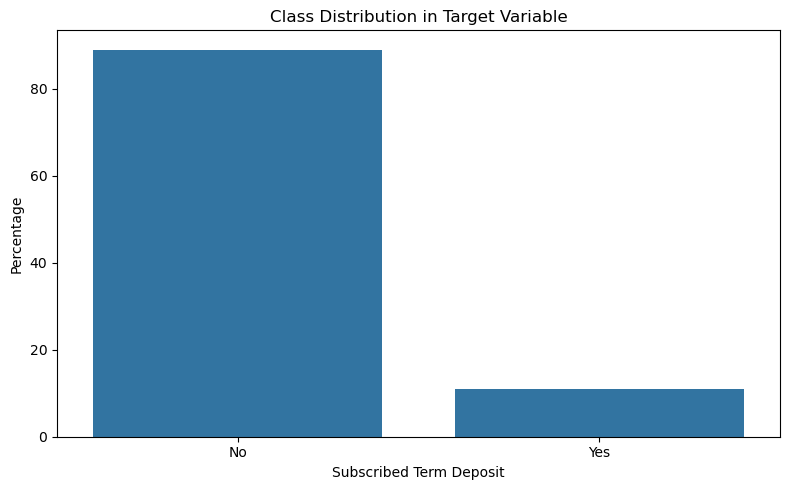

In [54]:
# Check class distribution
class_distribution = pd.Series(y_final).value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=['No', 'Yes'], y=class_distribution.values)
plt.title("Class Distribution in Target Variable")
plt.xlabel("Subscribed Term Deposit")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

In [55]:
# Show empty values
missing_values = df.isnull().sum()

# Show empty columns
missing_values = missing_values[missing_values > 0]

print("Empty columns and values: ")
print(missing_values)


Empty columns and values: 
Series([], dtype: int64)


### Split Data Into Training and Test Sets

In [57]:
# Compare the lengths of X_final and y_final
print(f"X_final shape: {X_final.shape}")
print(f"y_final shape: {y_final.shape}")


X_final shape: (4088, 20)
y_final shape: (4088,)


In [58]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, 
                                                   test_size=0.2, 
                                                   random_state=42, 
                                                   stratify=y_final)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (3270, 20)
Test set size: (818, 20)


In [59]:
# Cross-validation function to assess model stability
def evaluate_model_with_cv(estimator, X, y, cv=5):
    cv_scores = cross_val_score(estimator, X, y, cv=cv, scoring='f1')
    print(f"Cross-validation F1 scores: {cv_scores}")
    print(f"Mean F1 score: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")
    return cv_scores.mean()

In [60]:
# Define different resampling strategies
resampling_strategies = {
    'No Resampling': None,
    'SMOTE': SMOTE(random_state=42),
    'Random Under Sampling': RandomUnderSampler(random_state=42),
    'SMOTE-Tomek': SMOTETomek(random_state=42)
}

In [61]:
# SMOTE with pipeline
pipeline = ImbPipeline([
    ('resampling', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

selected_resampling = resampling_strategies['SMOTE']

# Evaluate
print("Evaluating model with SMOTE resampling...")
evaluate_model_with_cv(pipeline, X_train, y_train)

Evaluating model with SMOTE resampling...
Cross-validation F1 scores: [0.44660194 0.55837563 0.44761905 0.46       0.42727273]
Mean F1 score: 0.4680, Std: 0.0464


0.46797387023142284

## Train Model

In [63]:
# Define models with the selected resampling integration
print("\nDefining models with the selected resampling strategy...")
pipelines = {
    'Logistic Regression': ImbPipeline([
        ('resampling', selected_resampling) if selected_resampling else ('pass', 'passthrough'),
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    'Random Forest': ImbPipeline([
        ('resampling', selected_resampling) if selected_resampling else ('pass', 'passthrough'),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient Boosting': ImbPipeline([
        ('resampling', selected_resampling) if selected_resampling else ('pass', 'passthrough'),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'KNN': ImbPipeline([
        ('resampling', selected_resampling) if selected_resampling else ('pass', 'passthrough'),
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ])
}

# Train and evaluate initial models
print("\nTraining and evaluating initial models...")
results = {}
accuracies = {}
f1_scores = {}

for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    # Store classification report
    results[name] = classification_report(y_test, predictions, output_dict=True)
    
    # Store accuracy score
    accuracies[name] = accuracy_score(y_test, predictions)
    
    # Store F1 score for positive class (1)
    f1_scores[name] = results[name]['1']['f1-score']
    
    print(f"{name} Accuracy: {accuracies[name]:.4f}")
    print(f"{name} F1 Score (Class 1): {f1_scores[name]:.4f}")

# Find best initial model based on F1 score
best_model = max(f1_scores, key=f1_scores.get)
print(f"\nBest initial model: {best_model} with F1 score {f1_scores[best_model]:.4f}")


Defining models with the selected resampling strategy...

Training and evaluating initial models...

Training Logistic Regression...
Logistic Regression Accuracy: 0.8484
Logistic Regression F1 Score (Class 1): 0.5000

Training Random Forest...
Random Forest Accuracy: 0.8839
Random Forest F1 Score (Class 1): 0.5026

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.8631
Gradient Boosting F1 Score (Class 1): 0.4955

Training KNN...
KNN Accuracy: 0.8142
KNN F1 Score (Class 1): 0.4453

Best initial model: Random Forest with F1 score 0.5026


In [64]:
# Display classification reports
for name in results:
    print(f"\n{name} Classification Report:")
    report = results[name]
    print(f"Accuracy: {report['accuracy']:.4f}")
    print(f"Precision (Class 1): {report['1']['precision']:.4f}")
    print(f"Recall (Class 1): {report['1']['recall']:.4f}")
    print(f"F1-Score (Class 1): {report['1']['f1-score']:.4f}")


Logistic Regression Classification Report:
Accuracy: 0.8484
Precision (Class 1): 0.3924
Recall (Class 1): 0.6889
F1-Score (Class 1): 0.5000

Random Forest Classification Report:
Accuracy: 0.8839
Precision (Class 1): 0.4752
Recall (Class 1): 0.5333
F1-Score (Class 1): 0.5026

Gradient Boosting Classification Report:
Accuracy: 0.8631
Precision (Class 1): 0.4167
Recall (Class 1): 0.6111
F1-Score (Class 1): 0.4955

KNN Classification Report:
Accuracy: 0.8142
Precision (Class 1): 0.3315
Recall (Class 1): 0.6778
F1-Score (Class 1): 0.4453


## Hyperparameter Tuning

In [66]:
# Hyperparameter tuning

# Define parameter grids
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0]
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [67]:
# Create a dictionary of models and their parameter grids for hyperparameter tuning
models_to_tune = {
    'Logistic Regression': (pipelines['Logistic Regression'], param_grid_lr),
    'Random Forest': (pipelines['Random Forest'], param_grid_rf),
    'Gradient Boosting': (pipelines['Gradient Boosting'], param_grid_gb),
    'KNN': (pipelines['KNN'], param_grid_knn)
}


In [ ]:
# Create Grid Search objects and fit them
best_models = {}
best_params = {}
best_scores = {}

for name, (pipeline, param_grid) in models_to_tune.items():
    print(f"\nRunning GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='f1',  # Using F1 score which balances precision and recall
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Store best model, parameters and score
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1 score for {name}: {grid_search.best_score_:.4f}")

# Get the model with the highest F1 score
best_final_model_name = max(best_scores, key=best_scores.get)
best_final_model = best_models[best_final_model_name]
print(f"\nOverall best model: {best_final_model_name} with F1 score: {best_scores[best_final_model_name]:.4f}")


Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F1 score for Logistic Regression: 0.4808

Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest: {'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best F1 score for Random Forest: 0.5019

Running GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


## Model Evaluation 

In [ ]:
# Evaluate Final Models on Test Set
print("\nFINAL MODEL EVALUATION")
print("======================")

final_evaluation_results = {}

for name, model in best_models.items():
    # Make predictions
    predictions = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    cm = confusion_matrix(y_test, predictions)
    
    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, probas)
    
    # Store results
    final_evaluation_results[name] = {
        'accuracy': accuracy,
        'report': report, 
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'f1_score': report['1']['f1-score']
    }
    
    # Print metrics
    print(f"\n{name} RESULTS:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print(f"Precision (Class 1): {report['1']['precision']:.4f}")
    print(f"Recall (Class 1): {report['1']['recall']:.4f}")
    print(f"F1-Score (Class 1): {report['1']['f1-score']:.4f}")
    
    print("\nConfusion Matrix:")
    print(cm)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend(loc="lower left")
    plt.show()
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Subscribed', 'Subscribed'],
                yticklabels=['Not Subscribed', 'Subscribed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

In [ ]:
# Choose the final best model based on F1 score on test data
best_test_f1_scores = {name: results['f1_score'] for name, results in final_evaluation_results.items()}
final_best_model_name = max(best_test_f1_scores, key=best_test_f1_scores.get)
final_best_model = best_models[final_best_model_name]

print(f"\nFINAL SELECTED MODEL: {final_best_model_name} with F1-Score: {best_test_f1_scores[final_best_model_name]:.4f}")

In [ ]:
# Feature importance for the final model (if possible)
if final_best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Extract feature importances
    importances = final_best_model.named_steps['classifier'].feature_importances_
    feature_names = X_final.columns
    
    # Create series for easier handling
    feature_importance = pd.Series(importances, index=feature_names)
    
    # Sort importances
    sorted_importance = feature_importance.sort_values(ascending=False)
    
    # Print feature ranking
    print("\nFeature ranking for the final model:")
    for i, (feature, importance) in enumerate(sorted_importance.items()):
        if i < 15:  # Show top 15 features
            print(f"{i+1}. {feature}: {importance:.4f}")
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title("Feature importances")
    sorted_importance[:15].plot(kind='barh')
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()
    
    # SHAP Analysis for deeper feature importance understanding
    try:
        # Create a small subset of data for SHAP analysis if the dataset is large
        X_shap = X_test[:100]  # Using a subset for visualization
        
        # Create explainer
        explainer = shap.TreeExplainer(final_best_model.named_steps['classifier'])
        shap_values = explainer.shap_values(X_shap)
        
        # Plot summary
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_shap, feature_names=feature_names, plot_type="bar")
        plt.tight_layout()
        plt.show()
        
        # Plot detailed SHAP values
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_shap, feature_names=feature_names)
        plt.tight_layout()
        plt.show()
    except:
        print("SHAP analysis could not be performed. Ensure you have the SHAP package installed.")

In [ ]:
# Create a pipeline with the entire workflow for deployment
print("\nCreating full deployment pipeline...")

# Define the full preprocessing pipeline for new data
if isinstance(selected_resampling, type(None)):
    # If no resampling was selected
    full_pipeline = ImbPipeline([
        ('preprocessor', 'passthrough'),  # Placeholder for preprocessing steps that would be filled in the deployment app
        ('model', final_best_model)
    ])
else:
    # If resampling was selected
    full_pipeline = ImbPipeline([
        ('preprocessor', 'passthrough'),  # Placeholder for preprocessing steps
        ('model', final_best_model)
    ])


In [ ]:
'''# Save the best model
pickle.dump(final_best_model, open('bank_marketing_model_V2.pkl', 'wb'))

# Save feature names
pickle.dump(X_final.columns.tolist(), open('feature_names_V2.pkl', 'wb'))

# Save label encoder
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))'''

In [ ]:
'''# Save any additional information needed for deployment
deployment_info = {
    'model_name': final_best_model_name,
    'feature_names': X_final.columns.tolist(),
    'best_parameters': best_params[final_best_model_name],
    'categorical_columns': categorical_columns.tolist(),
    'performance_metrics': {
        'accuracy': final_evaluation_results[final_best_model_name]['accuracy'],
        'precision': final_evaluation_results[final_best_model_name]['report']['1']['precision'],
        'recall': final_evaluation_results[final_best_model_name]['report']['1']['recall'],
        'f1_score': final_evaluation_results[final_best_model_name]['report']['1']['f1-score'],
        'roc_auc': final_evaluation_results[final_best_model_name]['roc_auc']
    }
}'''

In [ ]:
'''# Save deployment info
pickle.dump(deployment_info, open('deployment_info.pkl', 'wb'))

print("\nModel and related files saved for Streamlit deployment:")
print("- bank_marketing_model.pkl: The trained best model")
print("- feature_names.pkl: List of features used in the model")
print("- label_encoder.pkl: Encoder for target variable")
print("- deployment_info.pkl: Additional information for deployment")

print("\nCompleted bank marketing prediction model pipeline!")'''